In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# include_top=True，表示會載入完整的 ResNet50 模型，包括加在最後3層的卷積層
# include_top=False，表示會載入 ResNet50 的模型，不包括加在最後3層的卷積層，通常是取得 Features
model = ResNet50(weights='imagenet', include_top=True) 

# Input：要辨識的影像
img_path = './image/dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 預測，取得features，維度為 (1,7,7,512)
features = model.predict(x)
# 取得前三個最可能的類別及機率
print('Predicted:', decode_predictions(features, top=3)[0])

Predicted: [('n02109961', 'Eskimo_dog', 0.39454857), ('n02110185', 'Siberian_husky', 0.30179912), ('n02114548', 'white_wolf', 0.2159026)]


In [2]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [3]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
dot_img_file = '/tmp/model_1.png'
SVG()

<IPython.core.display.SVG object>

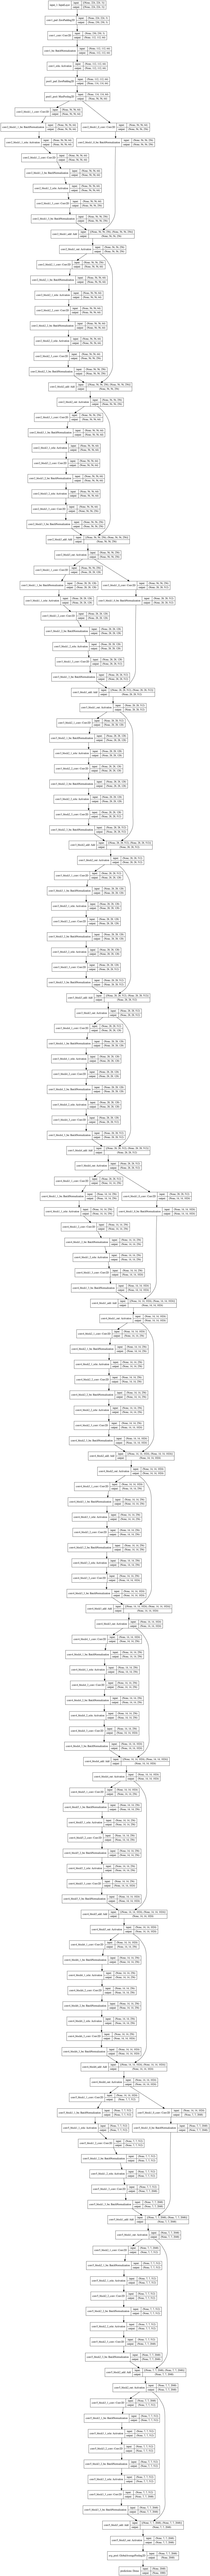

In [4]:
plot_model(model, to_file=dot_img_file, show_shapes=True)